In [1]:
import pandas as pd
import shelve
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_style('whitegrid')

In [425]:
for f in set([f[:-4] for f in os.listdir() if f.startswith('resultados_')]):
    with shelve.open(f) as db:
        try:
            print(f, db['nome_fundo'])
        except:
            pass
        
file = 'resultados_2_12055107000116.pkl'
print("***********************")
with shelve.open(file) as db:
    for k in list(db.keys()):
        print('loaded',k)
        globals()[k] = db[k]
        
print(nome_fundo)
file = "Index_PortfolioCompositionFile_IBOV_20100101_20181231.csv"
ibov = pd.read_csv(file, sep=';', encoding='latin=1', parse_dates=['RptDt'])

ibov['stock_value'] = ibov['ThrlQty'] * ibov['LastPric']
ibov['stock_weight'] = ibov['stock_value'].div(ibov.groupby('RptDt')['stock_value'].transform('sum'))

resultados_05589433000148.pkl BRAM FUNDO DE INVESTIMENTO EM AÇÕES IBOVESPA ATIVO
resultados_18138908000121.pkl ITAÚ IBOVESPA ATIVO MASTER FUNDO DE INVESTIMENTO EM AÇÕES
resultados_2_12055107000116.pkl ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I
resultados_11188572000162.pkl ATMOS MASTER FUNDO DE INVESTIMENTO DE AÇÕES
resultados_08279304000141.pkl ICATU VANGUARDA DIVIDENDOS FUNDO DE INVESTIMENTO EM AÇÕES
resultados_08912569000135.pkl GAP AÇÕES FUNDO DE INVESTIMENTO DE AÇÕES
resultados_11980010000157.pkl EQUITAS MASTER SELECTION FUNDO DE INVESTIMENTO DE AÇÕES
resultados_12055107000116.pkl ALASKA BLACK MASTER FUNDO DE INVESTIMENTO EM AÇÕES - BDR NÍVEL  I
resultados_02895694000106.pkl FRANKLIN VALOR E LIQUIDEZ FVL FUNDO DE INVESTIMENTO EM AÇÕES
resultados_01699688000102.pkl SANTANDER FI IBOVESPA ATIVO INSTITUCIONAL AÇÕES
resultados_13155995000101.pkl DAYCOVAL IBOVESPA ATIVO FUNDO DE INVESTIMENTO EM AÇÕES
resultados_08046355000123.pkl FUNDO DE INVESTIMENTO EM AÇÕES CAI

In [461]:
classes = pd.read_excel("Copy of classificao_acoes.xlsx", encoding='latin1')
classes.columns = ['SETOR', 'SUBSETOR',
                   'SEGMENTO', 'EMPRESA', 'CODIGO', 'SEGMENTO.1']
classes.sort_values('SETOR', inplace=True)
classes_acoes = dict(classes[['CODIGO', 'SUBSETOR']].apply(lambda s: s.str.strip()).values)

lastPric = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='LastPric')
thrlQty = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='ThrlQty') 
ecncVal = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='stock_value') 
stockPrtcptnPct = ibov.pivot_table(index='RptDt', columns='TckrSymb', values='stock_weight')

pesos_ibov = ecncVal.div(ecncVal.sum(1),axis=0).loc[:'2017']
retornos_ibov = lastPric.pct_change().mask(lastPric.isna()).loc[:'2017']

estimativas_pesos_acoes = estimativas.reindex(columns=retornos_acoes_empresa).div( estimativas.reindex(columns=retornos_acoes_empresa).sum(1), axis=0)

pesos_estimados = estimativas.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()

retornos_fundos_ponderados = estimativas.mul(signals)
retornos_ibov_ponderados = retornos_ibov.mul(pesos_ibov).reindex(index=retornos_fundos_ponderados.index)


In [462]:
retornos_fundos_acoes = estimativas_pesos_acoes.mul(signals).dropna(how='all', axis=1)

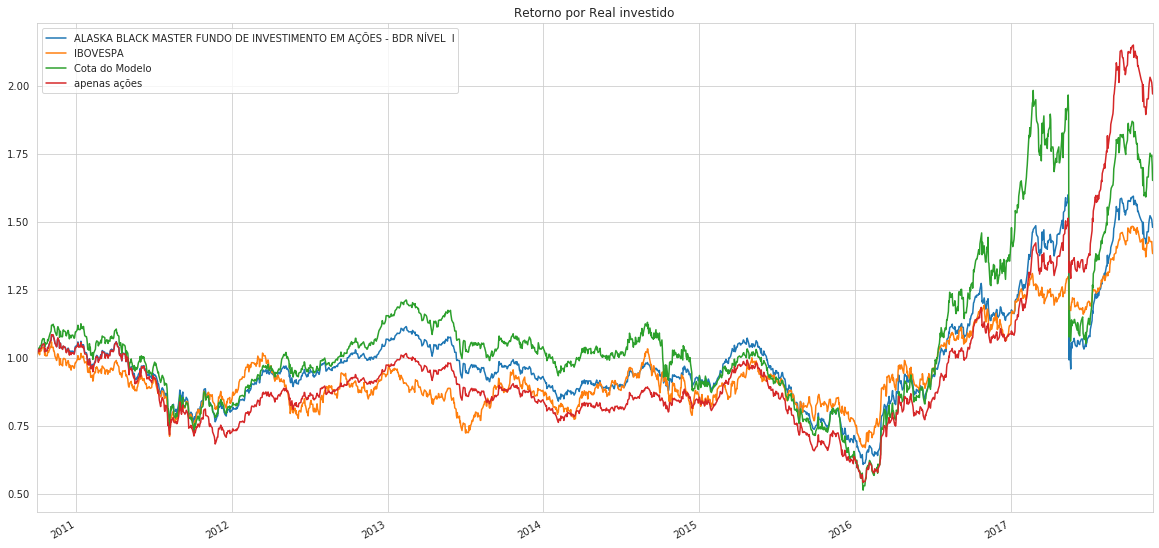

In [463]:
ax = retornos_fundos_ponderados.sum(1).add(1).cumprod().plot(label=nome_fundo, figsize=(20,10))
retornos_ibov_ponderados.sum(1).add(1).cumprod().plot(label='IBOVESPA', ax=ax)
measurements.add(1).cumprod().plot(ax=ax, label='Cota do Modelo')
retornos_fundos_acoes.sum(1).add(1).cumprod().plot(label='apenas ações', ax=ax)
ax.legend()
plt.title('Retorno por Real investido');

### Participação setorial no retorno do IBOV

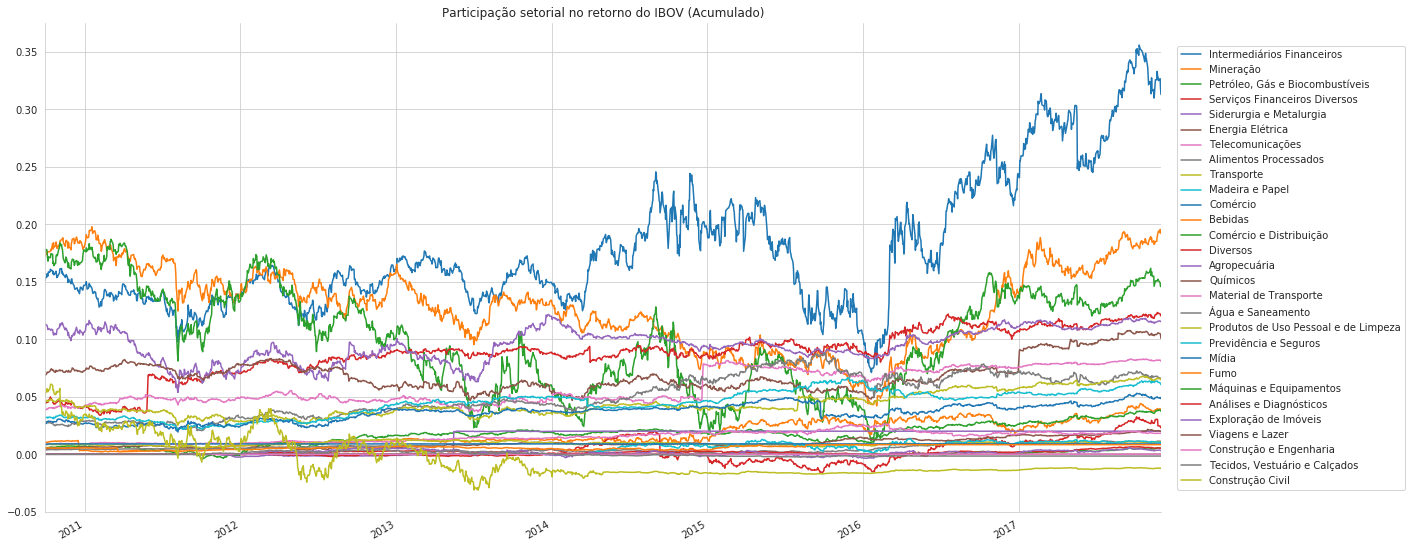

In [464]:
start = ecncVal.div(ecncVal.sum(1),axis=0).groupby(lambda c: classes_acoes.get(c[:4]), axis=1).sum().iloc[0]
ix = retornos_ibov_ponderados.groupby(lambda c: classes_acoes.get(c[:4]), axis=1).sum()
ix.iloc[0] = start
order = ix.add(1).cumprod().sub(1).iloc[-1].sort_values(ascending=False).index
#ax = ix.add(1).cumprod().sub(1).sum(1).plot( color='black', label='IBOV', alpha=.8, secondary_y=False, lw=1)
ax = ix.reindex(columns=order).add(1).cumprod().sub(1).plot(figsize=(20,10))
plt.title('Participação setorial no retorno do IBOV (Acumulado)');
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
sns.despine()


### Participação Setorial no retorno do fundo

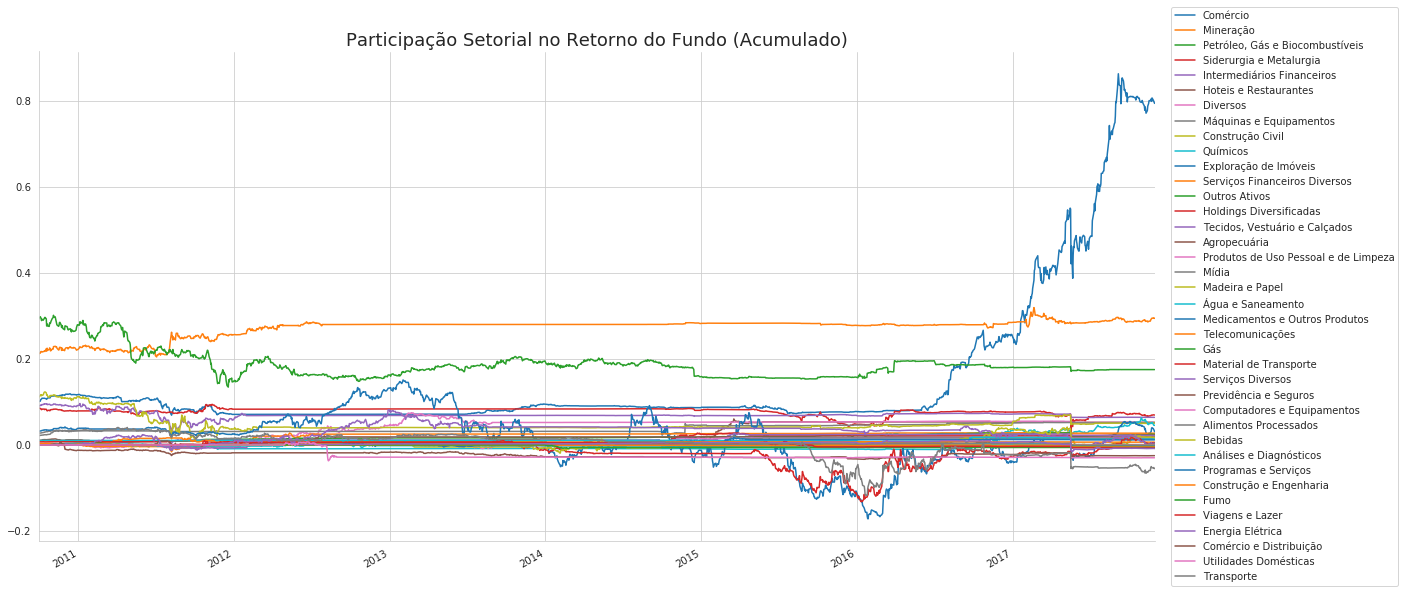

In [465]:
rfp_setor = retornos_fundos_ponderados.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()
rfp_setor.iloc[0] = estimativas_pesos_acoes.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum().iloc[0]

order = rfp_setor.add(1).cumprod().sub(1).iloc[-1].sort_values(ascending=False).index

ax = rfp_setor.reindex(columns=order).add(1).cumprod().sub(1).plot(figsize=(20,10))

plt.title('Participação Setorial no Retorno do Fundo (Acumulado)', fontsize=18);
ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
sns.despine()

### Alocação x Retorno  em açoes

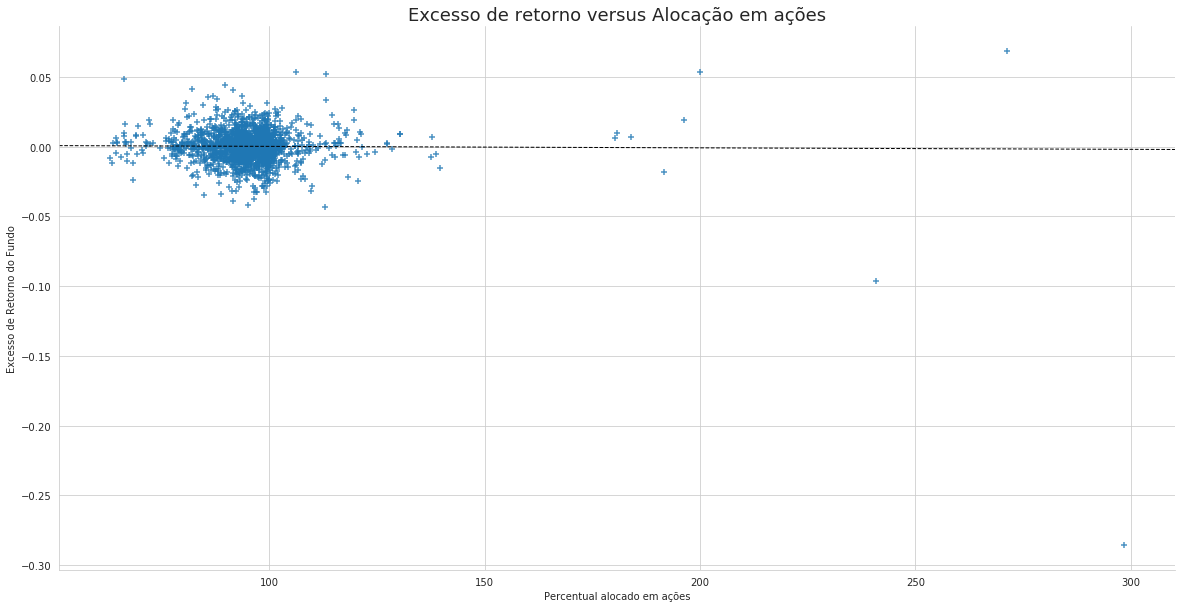

In [466]:
fig, ax = plt.subplots(1, figsize=(20,10))

excesso_retorno_fundo = retornos_fundos_ponderados.sum(1) - retornos_ibov_ponderados.sum(1)
diferenca_alocacao = estimativas.reindex(columns=retornos_acoes_empresa).sum(1) * 100

data = pd.concat([excesso_retorno_fundo, diferenca_alocacao], 
          keys=['Excesso de Retorno do Fundo','Percentual alocado em ações'],
          axis=1)#.plot.scatter(1,0, figsize=(20,10))
sns.regplot(data=data, y=data.columns[0], x=data.columns[1], ax=ax, ci=None, marker='+',
           line_kws={'ls':'--', 'lw':1, 'color':'k'}, robust=True)
plt.title('Excesso de retorno versus Alocação em ações', fontsize=18);
#ax.legend(loc='center left', bbox_to_anchor=(1.01, 0.5))
sns.despine()

### Alocação x Retorno por setor

In [467]:
rf_setoriais = retornos_fundos_acoes.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()
ri_setoriais = retornos_ibov_ponderados.groupby(lambda c: classes_acoes.get(c[:4],'Outros Ativos'), axis=1).sum()

alocacao_fundo_setorial = estimativas_pesos_acoes.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1).sum()
alocacao_ibov_setorial = pesos_ibov.groupby(lambda c: classes_acoes.get(c[:4],'Outros Ativos'), axis=1).sum()

excesso_retorno_setorial = rf_setoriais - ri_setoriais
excesso_alocacao_setorial = (alocacao_fundo_setorial - alocacao_ibov_setorial).dropna(how='all')

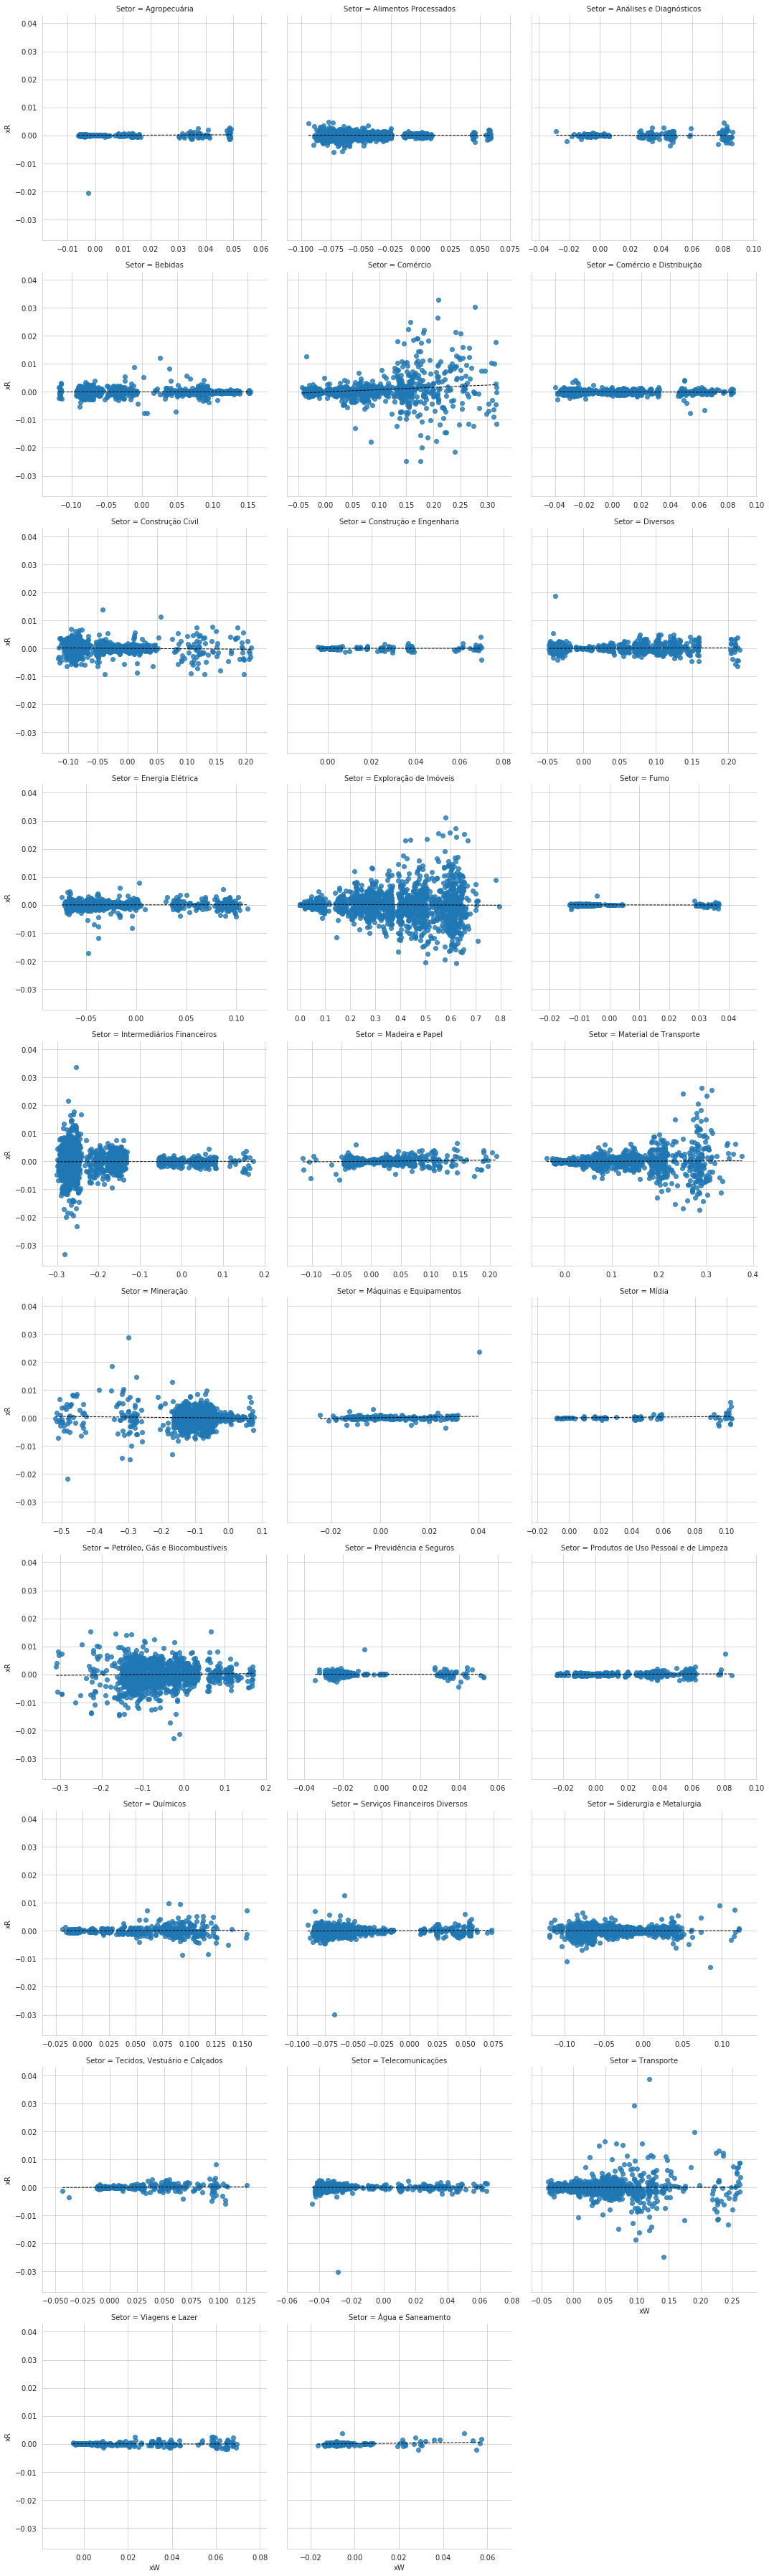

In [468]:
data = pd.concat([excesso_retorno_setorial.stack(), excesso_alocacao_setorial.stack()], axis=1, keys=['xR', 'xW'])
data.index = data.index.set_names(['Data','Setor'])

g = sns.lmplot(data=data.reset_index(), x='xW', y='xR', col='Setor', col_wrap=3, ci=None, truncate=True,
               sharex=False, sharey='col',
           line_kws={'ls':'--', 'lw':1, 'color':'k'}, scatter_kws={'marker':'x'})

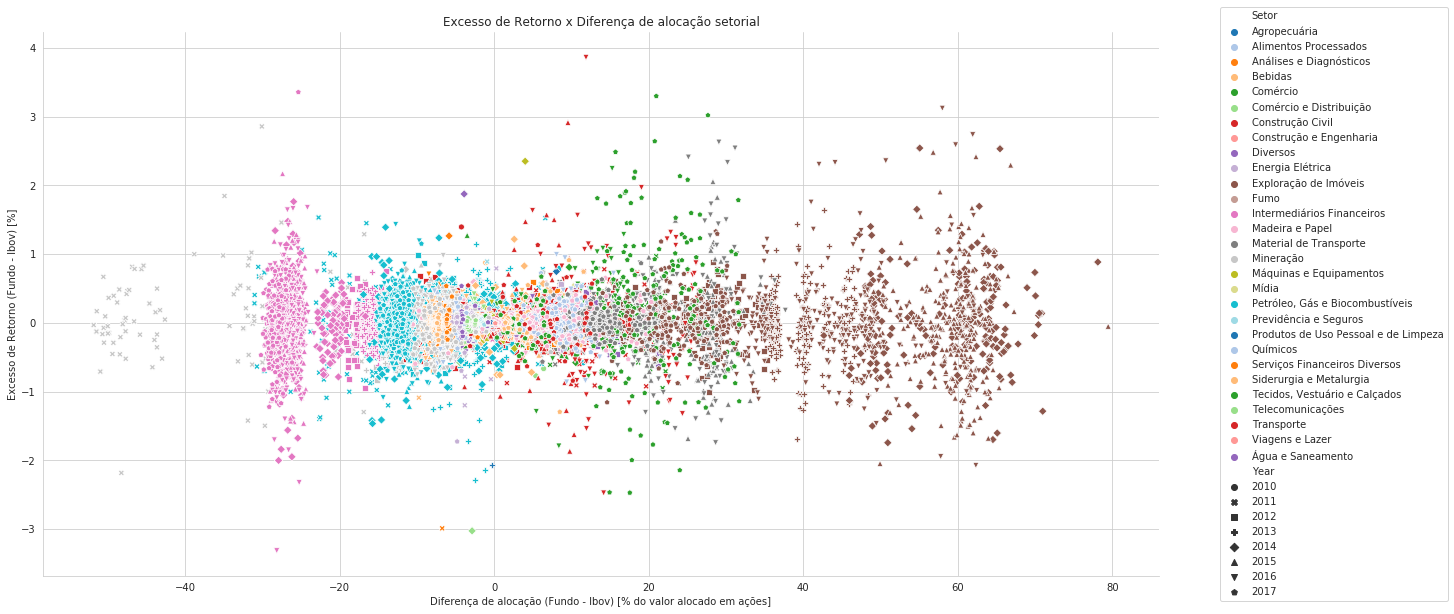

In [469]:
fig, ax = plt.subplots(1, figsize=(20,10))


keys = ['Excesso de Retorno (Fundo - Ibov) [%]','Diferença de alocação (Fundo - Ibov)']
ix = pd.concat([excesso_retorno_setorial, excesso_alocacao_setorial], 
          keys=keys,
          axis=1).stack(level=-1) * 100
ix.index.names = ['Data','Setor']

data = ix.reset_index() 


data['Year'] = data['Data'].dt.year
sns.scatterplot(data=data, x=keys[1], y=keys[0], hue='Setor', style='Year', ax=ax, palette='tab20')
ax.set_xlabel('Diferença de alocação (Fundo - Ibov) [% do valor alocado em ações]')
ax.set_title('Excesso de Retorno x Diferença de alocação setorial')
ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
sns.despine()

fig, ax = plt.subplots(1, figsize=(20,10))
sns.swarmplot(data=data, x='Year', y=keys[1], hue='Setor', ax=ax)

In [470]:
import statsmodels.api as sm

Y = data[keys[0]].copy()
X = data[keys[1]].copy()
X = sm.add_constant(X)

model = sm.OLS(Y,X,missing='drop').fit()
model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Ordinary least squares
=========================================================================================
Model:              OLS                                   Adj. R-squared:     0.000      
Dependent Variable: Excesso de Retorno (Fundo - Ibov) [%] AIC:                -23424.3753
Date:               2019-10-08 18:23                      BIC:                -23406.6776
No. Observations:   51475                                 Log-Likelihood:     11714.     
Df Model:           1                                     F-statistic:        16.78      
Df Residuals:       51473                                 Prob (F-statistic): 4.21e-05   
R-squared:          0.000                                 Scale:              0.037143   
------------------------------------------------------------------------------------------
                                         Coef.   Std.Err.    t     P>|t|    [0.025  0.975]
------------------------------------------------------------------------------------------
const                                    0.0005    0.0008  0.5996  0.5488  -0.0012  0.0022
Diferença de alocação (Fundo - Ibov)     0.0003    0.0001  4.0958  0.0000   0.0002  0.0005
-----------------------------------------------------------------------------------------
Omnibus:                    21881.174            Durbin-Watson:               2.031      
Prob(Omnibus):              0.000                Jarque-Bera (JB):            5024601.858
Skew:                       0.880                Prob(JB):                    0.000      
Kurtosis:                   51.369               Condition No.:               10         
=========================================================================================

"""

In [471]:
import statsmodels.api as sm

Y = data[keys[0]].copy()
X = pd.get_dummies(data[['Setor',keys[1]]]).copy().iloc[:,1:-1]
#X = sm.add_constant(X)

model = sm.OLS(Y,X,missing='drop').fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Excesso de Retorno (Fundo - Ibov) [%]   R-squared (uncentered):                   0.001
Model:                                               OLS   Adj. R-squared (uncentered):              0.001
Method:                                    Least Squares   F-statistic:                              2.036
Date:                                   Tue, 08 Oct 2019   Prob (F-statistic):                    0.000975
Time:                                           18:23:11   Log-Likelihood:                          12307.
No. Observations:                                  52258   AIC:                                 -2.456e+04
Df Residuals:                                      52230   BIC:                                 -2.431e+04
Df Model:                                             28                                                  
Covariance Type:                               nonrobust                                                  
==============================================================================================================
                                                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
Setor_Agropecuária                            -0.0006      0.005     -0.143      0.886      -0.009       0.008
Setor_Alimentos Processados                   -0.0018      0.005     -0.402      0.687      -0.011       0.007
Setor_Análises e Diagnósticos                 -0.0003      0.005     -0.060      0.952      -0.009       0.009
Setor_Bebidas                                 -0.0016      0.005     -0.347      0.729      -0.010       0.007
Setor_Comércio                                 0.0310      0.005      6.874      0.000       0.022       0.040
Setor_Comércio e Distribuição                 -0.0032      0.005     -0.703      0.482      -0.012       0.006
Setor_Construção Civil                         0.0005      0.005      0.110      0.912      -0.008       0.009
Setor_Construção e Engenharia              -6.414e-05      0.005     -0.014      0.989      -0.009       0.009
Setor_Diversos                                 0.0018      0.005      0.405      0.686      -0.007       0.011
Setor_Energia Elétrica                        -0.0021      0.005     -0.463      0.644      -0.011       0.007
Setor_Exploração de Imóveis                    0.0031      0.005      0.693      0.488      -0.006       0.012
Setor_Fumo                                    -0.0005      0.005     -0.107      0.914      -0.009       0.008
Setor_Intermediários Financeiros              -0.0101      0.005     -2.231      0.026      -0.019      -0.001
Setor_Madeira e Papel                          0.0007      0.005      0.152      0.879      -0.008       0.010
Setor_Material de Transporte                4.125e-05      0.005      0.009      0.993      -0.009       0.009
Setor_Mineração                                0.0031      0.005      0.688      0.491      -0.006       0.012
Setor_Máquinas e Equipamentos                  0.0012      0.005      0.256      0.798      -0.008       0.010
Setor_Mídia                                    0.0009      0.005      0.201      0.840      -0.008       0.010
Setor_Petróleo, Gás e Biocombustíveis         -0.0043      0.005     -0.957      0.338      -0.013       0.005
Setor_Previdência e Seguros                   -0.0001      0.005     -0.022      0.982      -0.009       0.009
Setor_Produtos de Uso Pessoal e de Limpeza     0.0009      0.005      0.199      0.842      -0.008       0.010
Setor_Químicos                                 0.0015      0.005      0.332      0.740      -0.007       0.010


In [472]:

for setor in data.Setor.unique():

    Y = data.query("Setor == '{}'".format(setor))[keys[0]].copy()
    X = data.query("Setor == '{}'".format(setor))[keys[1]].copy()
    #X = sm.add_constant(X)

    model = sm.OLS(Y,X,missing='drop').fit()
    print(model.summary(title="OLS Regression Results for {}".format(setor)))

                                 OLS Regression Results for Agropecuária                                  
Dep. Variable:     Excesso de Retorno (Fundo - Ibov) [%]   R-squared (uncentered):                   0.004
Model:                                               OLS   Adj. R-squared (uncentered):              0.003
Method:                                    Least Squares   F-statistic:                              6.376
Date:                                   Tue, 08 Oct 2019   Prob (F-statistic):                      0.0117
Time:                                           18:23:11   Log-Likelihood:                          2684.8
No. Observations:                                   1775   AIC:                                     -5368.
Df Residuals:                                       1774   BIC:                                     -5362.
Df Model:                                              1                                                  
Covariance Type:                     

                               OLS Regression Results for Energia Elétrica                                
Dep. Variable:     Excesso de Retorno (Fundo - Ibov) [%]   R-squared (uncentered):                   0.000
Model:                                               OLS   Adj. R-squared (uncentered):             -0.000
Method:                                    Least Squares   F-statistic:                             0.6999
Date:                                   Tue, 08 Oct 2019   Prob (F-statistic):                       0.403
Time:                                           18:23:11   Log-Likelihood:                          1378.9
No. Observations:                                   1775   AIC:                                     -2756.
Df Residuals:                                       1774   BIC:                                     -2750.
Df Model:                                              1                                                  
Covariance Type:                     

                             OLS Regression Results for Previdência e Seguros                             
Dep. Variable:     Excesso de Retorno (Fundo - Ibov) [%]   R-squared (uncentered):                   0.000
Model:                                               OLS   Adj. R-squared (uncentered):             -0.001
Method:                                    Least Squares   F-statistic:                          0.0008246
Date:                                   Tue, 08 Oct 2019   Prob (F-statistic):                       0.977
Time:                                           18:23:11   Log-Likelihood:                          2931.8
No. Observations:                                   1775   AIC:                                     -5862.
Df Residuals:                                       1774   BIC:                                     -5856.
Df Model:                                              1                                                  
Covariance Type:                     

In [240]:
s = model.summary()

In [235]:
print(model.summary())

                                    OLS Regression Results                                   
Dep. Variable:     Excesso de Retorno (Fundo - Ibov)   R-squared:                       0.011
Model:                                           OLS   Adj. R-squared:                  0.011
Method:                                Least Squares   F-statistic:                     22.20
Date:                               Tue, 08 Oct 2019   Prob (F-statistic):           2.63e-06
Time:                                       16:02:30   Log-Likelihood:                 12028.
No. Observations:                               1941   AIC:                        -2.405e+04
Df Residuals:                                   1939   BIC:                        -2.404e+04
Df Model:                                          1                                         
Covariance Type:                           nonrobust                                         
                                           coef    std err  

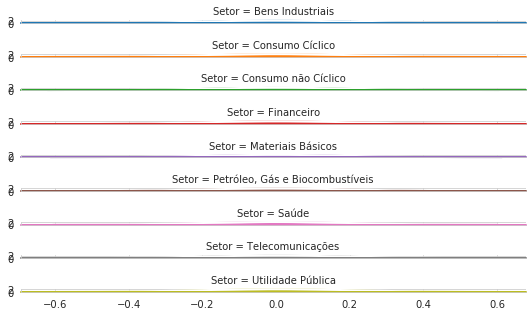

In [13]:
df = ix.reset_index()

g = sns.FacetGrid(df, row=df.columns[1], hue=df.columns[1], aspect=15, height=.5)
g.map(sns.kdeplot, df.columns[2], clip_on=False, shade=True, alpha=1, lw=1.5, bw=.2)
g.map(sns.kdeplot, df.columns[2], clip_on=False, color="w", lw=2, bw=.2)
g.map(plt.axhline, y=0, lw=2, clip_on=False)

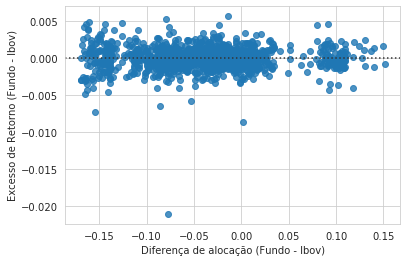

In [14]:
data = ix.xs("Consumo não Cíclico", level="Setor")
sns.residplot(data=data, x=data.columns[1], y=data.columns[0])


In [ ]:
rf_grpby = retornos_fundos_ponderados.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1)
ri_grpby = retornos_ibov_ponderados.groupby(lambda c: classes_acoes.get(c[:4],'Outros Ativos'), axis=1)


In [ ]:
a = rf_grpby.get_group('Consumo Cíclico')

b = ri_grpby.get_group('Consumo Cíclico')

In [ ]:
af = estimativas.groupby(lambda c: classes_acoes.get(c,'Outros Ativos'), axis=1)
ai = pesos_ibov.groupby(lambda c: classes_acoes.get(c[:4],'Outros Ativos'), axis=1)

In [ ]:
b.columns = b.columns.str.slice(0,4)

In [ ]:
x = (a - b).dropna(axis=1, how='all')

In [ ]:
aa = af.get_group('Consumo Cíclico')
bb = ai.get_group('Consumo Cíclico')
bb.columns = b.columns.str.slice(0,4)

In [ ]:
y = (aa - bb).dropna(axis=1, how='all')

In [ ]:
bb.iloc[:100].dropna(axis=1, how='all').plot.area()

In [ ]:
aa.iloc[:60].dropna(axis=1, how='all').cumsum(1).plot()

In [ ]:
stockPrtcptnPct['ITUB4'].loc['2015':].plot()